In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
import scipy.io as sio
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import PredefinedSplit
from sklearn import preprocessing
%matplotlib inline

In [2]:
dados_teste = sio.loadmat('dados_teste.mat')
dados_treino = sio.loadmat('dados_treinamento.mat')
dados_valid = sio.loadmat('dados_val.mat')

X_test = np.array(dados_teste["Xt"])
y_test =  np.array(dados_teste["yt"]).astype(np.float)
X_train =  np.array(dados_treino["X"])
y_train =  np.array(dados_treino["y"]).astype(np.float)
X_valid =  np.array(dados_valid["Xval"])
y_valid =  np.array(dados_valid["yval"]).astype(np.float)

print(np.mean(X_train, axis=0))

[-0.01650581 -0.01679264]


In [3]:
print(np.mean(X_train, axis=0))
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
print(scaler.mean_)
print(scaler.var_)

[-0.01650581 -0.01679264]
[-0.01650581 -0.01679264]
[0.95239618 0.95230436]


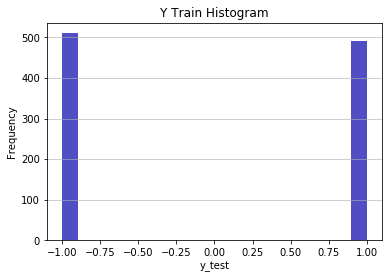

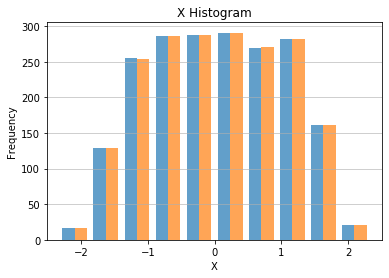

In [4]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(y_train, bins=20, color='#0504aa',
                            alpha=0.7)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('y_test')
plt.ylabel('Frequency')
plt.title('Y Train Histogram')
plt.show()

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(np.concatenate((X_train, X_valid)), bins=10,alpha=0.7)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('X')
plt.ylabel('Frequency')
plt.title('X Histogram')
plt.show()

In [5]:
    
def svm_fit_plot_report(X_train, y_train, X_valid, y_valid, gamma_array, penality_array):
    scores = ['precision', 'recall', 'accuracy']    
    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()
        parameters = {'C':penality_array, 'gamma':gamma_array}

        # The indices which have the value -1 will be kept in train.
        #train_indices = np.full((len(X_train),), -1, dtype=int)

        # The indices which have zero or positive values, will be kept in test
        #test_indices = np.full((len(X_valid),), 0, dtype=int)
        #test_fold = np.append(train_indices, test_indices) 

        #ps = PredefinedSplit(test_fold)
        
        svc = svm.SVC()
        clf = GridSearchCV(svc, parameters, cv=2, n_jobs=-1)
        
        X = np.concatenate((X_train, X_valid))
        y = np.concatenate((y_train, y_valid))
        #print(len(X_train))
        #print(len(X))
        clf.fit(X, y)
    
        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()
        
        print("Refit with all data (train + validation):")
        print()
        
        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        y_true, y_pred = y_test, clf.predict(X_test)
        print(classification_report(y_true, y_pred))
        print()
    
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        
        h = .01  # step size in the mesh
        
        x_min, x_max = X[:, 0].min(), X[:, 0].max()
        y_min, y_max = X[:, 1].min(), X[:, 1].max()
                
        #xx, yy = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        fig = plt.figure(figsize=(20, 20))
        plt.pcolormesh(xx, yy, Z, cmap=plt.cm.bwr)
        
        # Plot support vectors
        print("Number of support vector: " + str(clf.best_estimator_.n_support_))
        plt.scatter(clf.best_estimator_.support_vectors_[:, 0], 
                    clf.best_estimator_.support_vectors_[:, 1],
                    s=80, zorder=10, edgecolors='k',
                   marker="d")

        plt.title('2-Class classification using Support Vector Machine')
        plt.axis('tight')
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.show()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1.0, 'gamma': 10.0}

Grid scores on development set:

0.504 (+/-0.000) for {'C': 0.001, 'gamma': 0.001}
0.504 (+/-0.000) for {'C': 0.001, 'gamma': 0.01}
0.504 (+/-0.000) for {'C': 0.001, 'gamma': 0.1}
0.504 (+/-0.000) for {'C': 0.001, 'gamma': 1.0}
0.504 (+/-0.000) for {'C': 0.001, 'gamma': 10.0}
0.504 (+/-0.000) for {'C': 0.001, 'gamma': 100.0}
0.504 (+/-0.000) for {'C': 0.001, 'gamma': 1000.0}
0.504 (+/-0.000) for {'C': 0.01, 'gamma': 0.001}
0.504 (+/-0.000) for {'C': 0.01, 'gamma': 0.01}
0.673 (+/-0.085) for {'C': 0.01, 'gamma': 0.1}
0.713 (+/-0.012) for {'C': 0.01, 'gamma': 1.0}
0.504 (+/-0.000) for {'C': 0.01, 'gamma': 10.0}
0.504 (+/-0.000) for {'C': 0.01, 'gamma': 100.0}
0.504 (+/-0.000) for {'C': 0.01, 'gamma': 1000.0}
0.504 (+/-0.000) for {'C': 0.1, 'gamma': 0.001}
0.564 (+/-0.023) for {'C': 0.1, 'gamma': 0.01}
0.619 (+/-0.055) for {'C': 0.1, 'gamma': 0.1}
0.860 (+/-0.009) for {'C': 0

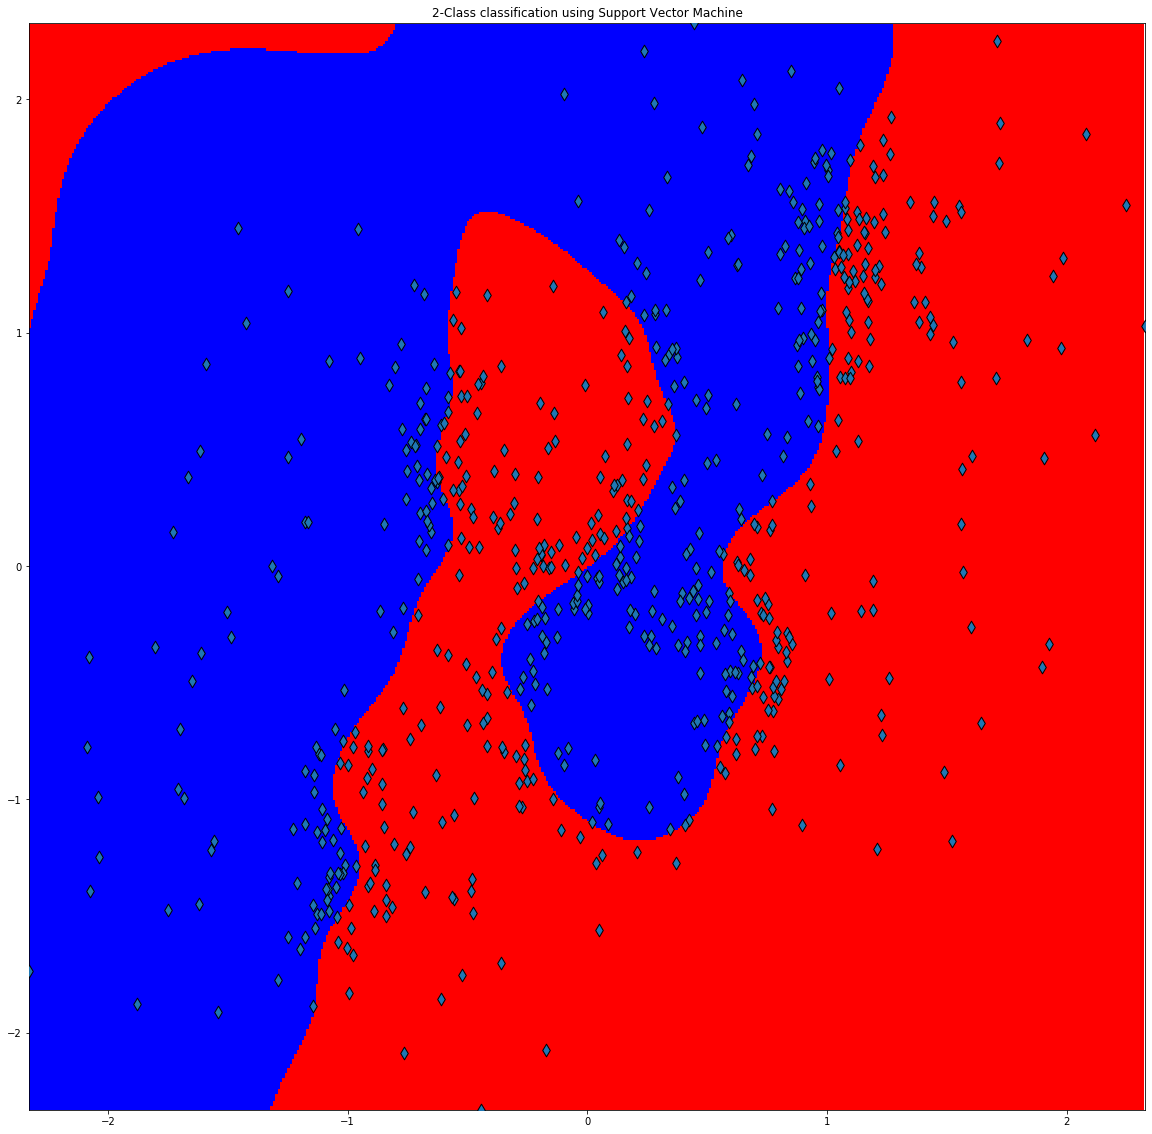

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 1.0, 'gamma': 10.0}

Grid scores on development set:

0.504 (+/-0.000) for {'C': 0.001, 'gamma': 0.001}
0.504 (+/-0.000) for {'C': 0.001, 'gamma': 0.01}
0.504 (+/-0.000) for {'C': 0.001, 'gamma': 0.1}
0.504 (+/-0.000) for {'C': 0.001, 'gamma': 1.0}
0.504 (+/-0.000) for {'C': 0.001, 'gamma': 10.0}
0.504 (+/-0.000) for {'C': 0.001, 'gamma': 100.0}
0.504 (+/-0.000) for {'C': 0.001, 'gamma': 1000.0}
0.504 (+/-0.000) for {'C': 0.01, 'gamma': 0.001}
0.504 (+/-0.000) for {'C': 0.01, 'gamma': 0.01}
0.673 (+/-0.085) for {'C': 0.01, 'gamma': 0.1}
0.713 (+/-0.012) for {'C': 0.01, 'gamma': 1.0}
0.504 (+/-0.000) for {'C': 0.01, 'gamma': 10.0}
0.504 (+/-0.000) for {'C': 0.01, 'gamma': 100.0}
0.504 (+/-0.000) for {'C': 0.01, 'gamma': 1000.0}
0.504 (+/-0.000) for {'C': 0.1, 'gamma': 0.001}
0.564 (+/-0.023) for {'C': 0.1, 'gamma': 0.01}
0.619 (+/-0.055) for {'C': 0.1, 'gamma': 0.1}
0.860 (+/-0.009) for {'C': 0.1,

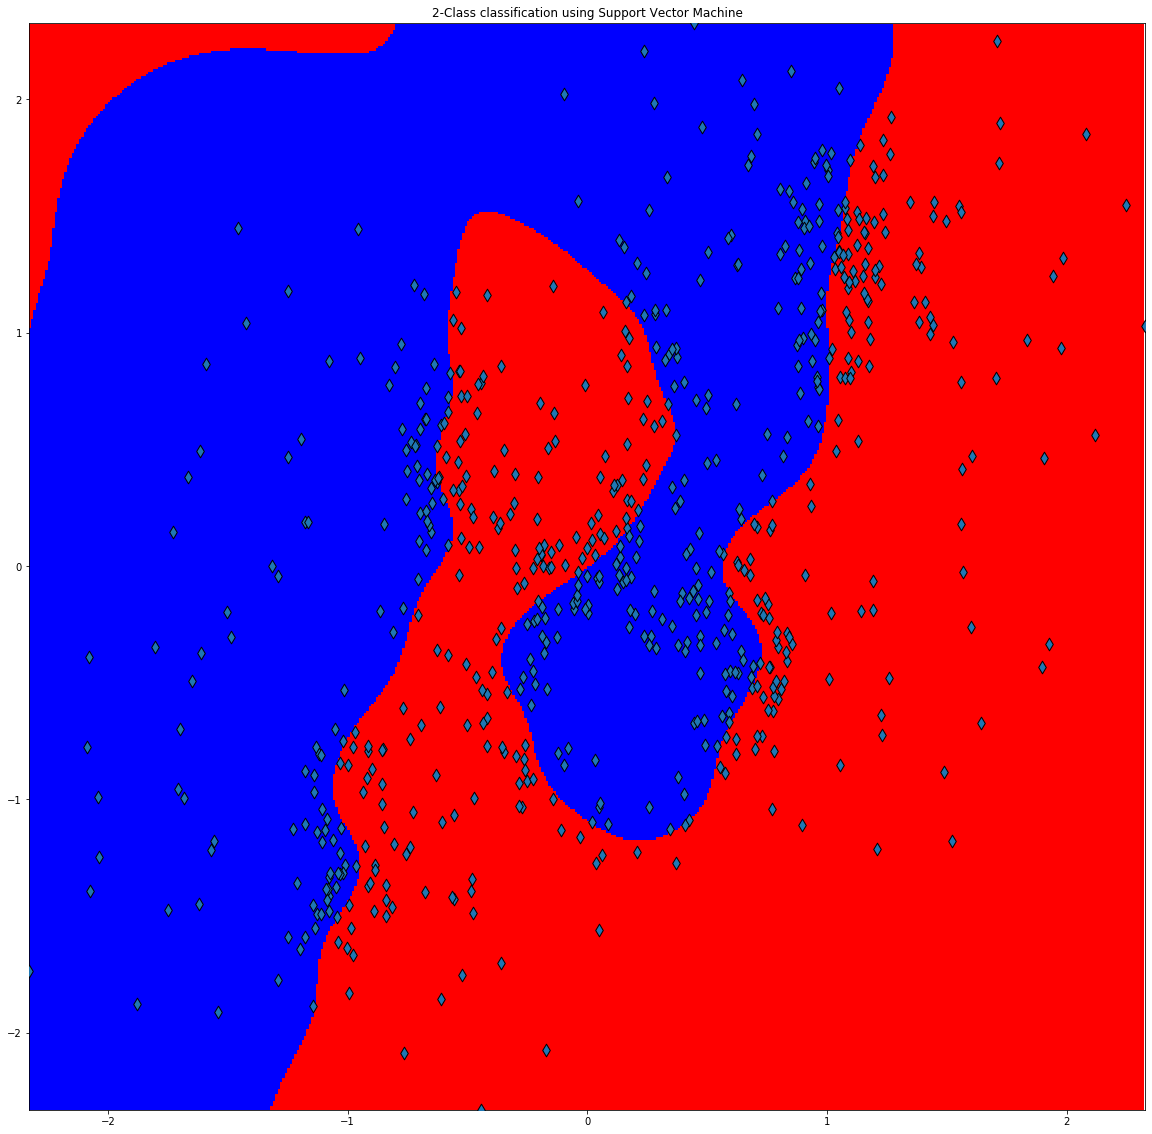

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 1.0, 'gamma': 10.0}

Grid scores on development set:

0.504 (+/-0.000) for {'C': 0.001, 'gamma': 0.001}
0.504 (+/-0.000) for {'C': 0.001, 'gamma': 0.01}
0.504 (+/-0.000) for {'C': 0.001, 'gamma': 0.1}
0.504 (+/-0.000) for {'C': 0.001, 'gamma': 1.0}
0.504 (+/-0.000) for {'C': 0.001, 'gamma': 10.0}
0.504 (+/-0.000) for {'C': 0.001, 'gamma': 100.0}
0.504 (+/-0.000) for {'C': 0.001, 'gamma': 1000.0}
0.504 (+/-0.000) for {'C': 0.01, 'gamma': 0.001}
0.504 (+/-0.000) for {'C': 0.01, 'gamma': 0.01}
0.673 (+/-0.085) for {'C': 0.01, 'gamma': 0.1}
0.713 (+/-0.012) for {'C': 0.01, 'gamma': 1.0}
0.504 (+/-0.000) for {'C': 0.01, 'gamma': 10.0}
0.504 (+/-0.000) for {'C': 0.01, 'gamma': 100.0}
0.504 (+/-0.000) for {'C': 0.01, 'gamma': 1000.0}
0.504 (+/-0.000) for {'C': 0.1, 'gamma': 0.001}
0.564 (+/-0.023) for {'C': 0.1, 'gamma': 0.01}
0.619 (+/-0.055) for {'C': 0.1, 'gamma': 0.1}
0.860 (+/-0.009) for {'C': 0.

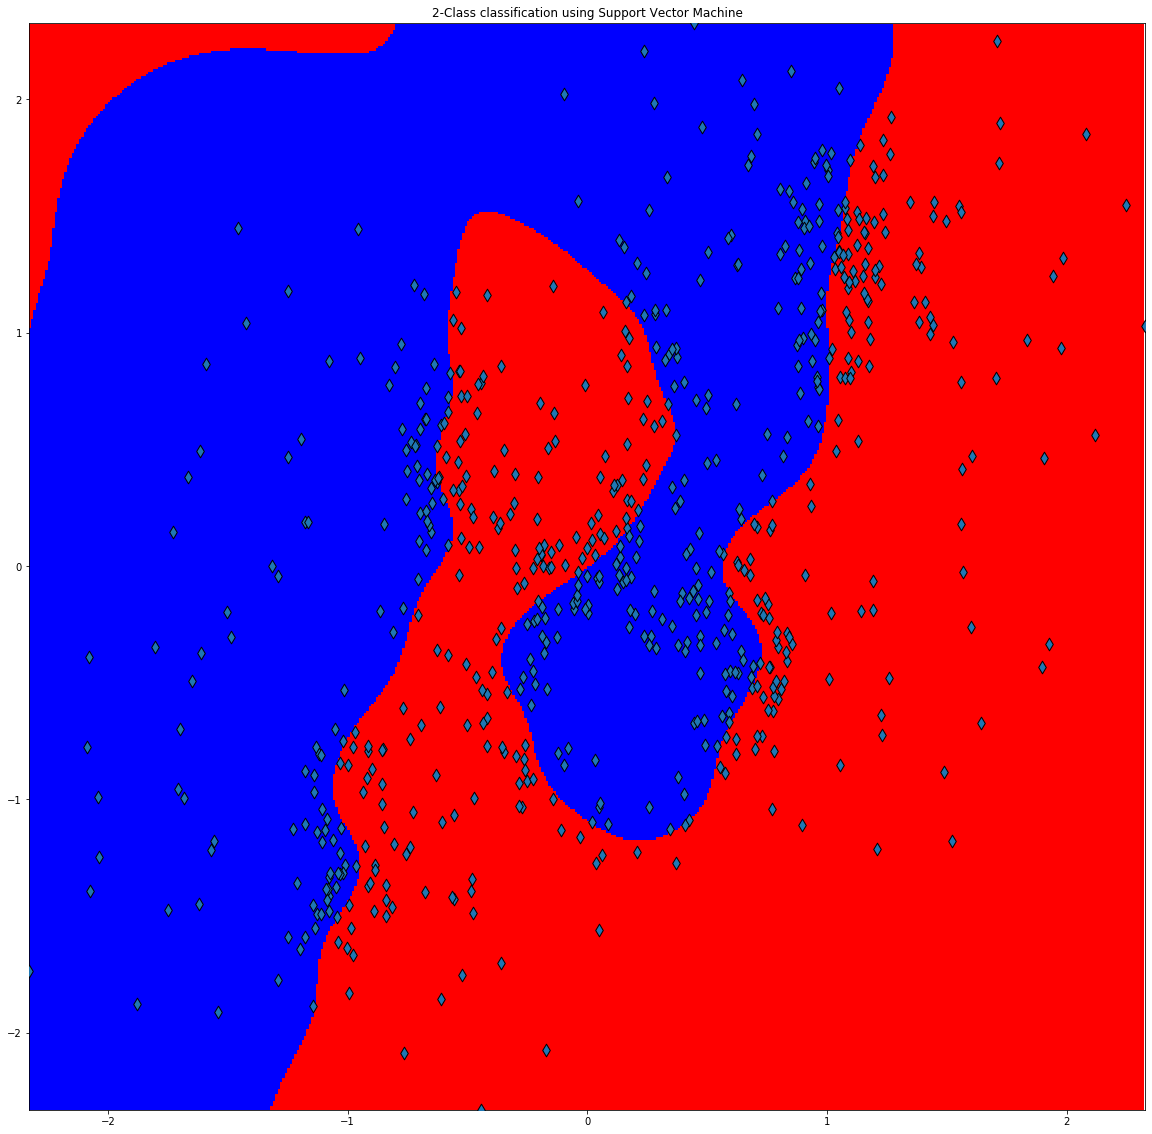

In [6]:
svm_fit_plot_report(X_train, y_train.ravel(),
                       X_valid, y_valid.ravel(),
                       #np.geomspace(10, 100, 1), #gamma
                       #np.geomspace(0.1, 1, 1)) #penality                 
                       np.geomspace(0.001, 1000, 7), #gamma
                       np.geomspace(0.001, 1000, 7)) #penality

1000
2000


/home/navarro/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

        -1.0       0.89      0.87      0.88       499
         1.0       0.87      0.89      0.88       501

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000




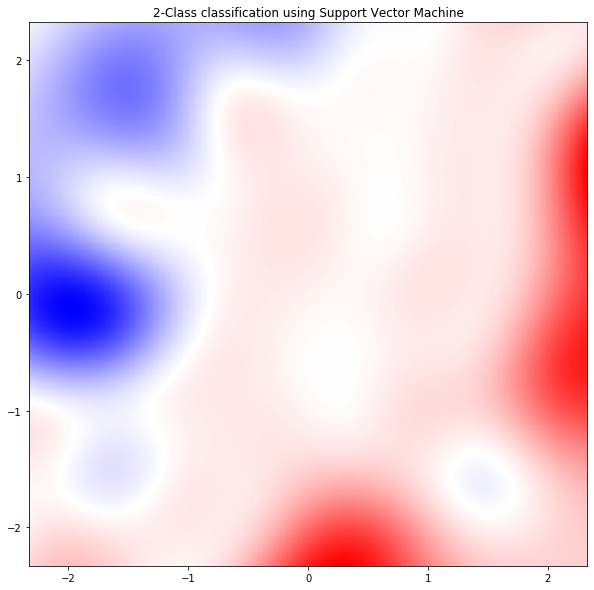

In [7]:
svc = svm.SVC(gamma=1, C=10000)

X = np.concatenate((X_train, X_valid))
y = np.concatenate((y_train, y_valid))
print(len(X_train))
print(len(X))
svc.fit(X, y)

print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, svc.predict(X_test)
print(classification_report(y_true, y_pred))
print()

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

h = .01  # step size in the mesh

x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()

#xx, yy = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
#Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig = plt.figure(figsize=(10, 10))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.bwr)

plt.title('2-Class classification using Support Vector Machine')
plt.axis('tight')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [8]:
len(y)

2000

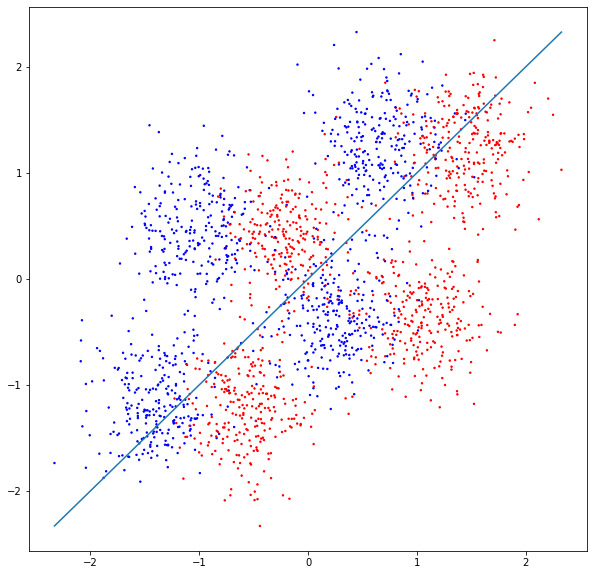

In [9]:
# Plot data\
fig = plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=plt.cm.bwr, s=2)
plt.plot([x_min, x_max], [y_min, y_max])
#plt.plot([-x_min, -x_max], [-y_min, -y_max])
plt.show()

ValueError: 'c' argument has 2000 elements, which is not acceptable for use with 'x' with size 150, 'y' with size 150.

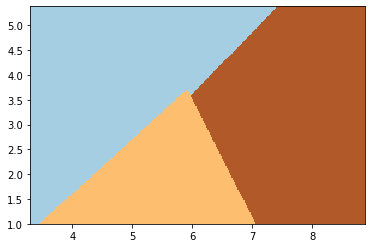

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
Y = iris.target


def my_kernel(X, Y):
    """
    We create a custom kernel:

                 (2  0)
    k(X, Y) = X  (    ) Y.T
                 (0  1)
    """
    M = np.array([[2, 0], [0, 1.0]])
    return np.dot(np.dot(X, M), Y.T)


h = .02  # step size in the mesh

# we create an instance of SVM and fit out data.
clf = svm.SVC(kernel=my_kernel)
clf.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=plt.cm.Paired, edgecolors='k')
plt.title('3-Class classification using Support Vector Machine with custom'
          ' kernel')
plt.axis('tight')
plt.show()

In [ ]:
Y, y.ravel()